In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

## **Read CSV file**

In [2]:
attributes= pd.read_csv('archive/list_attr_celeba.csv')
bboxes= pd.read_csv('archive/list_bbox_celeba.csv')
partition= pd.read_csv('archive/list_eval_partition.csv')
landmarks= pd.read_csv('archive/list_landmarks_align_celeba.csv')
base_directory= 'archive/img_align_celeba'

In [3]:
import glob
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
images= []
image_folder= 'archive/img_align_celeba/img_align_celeba/*.jpg'
img_paths= glob.glob(image_folder)

print(f"Found {len(img_paths)} images.")

Found 202599 images.


### **Plot of the images in the folder**

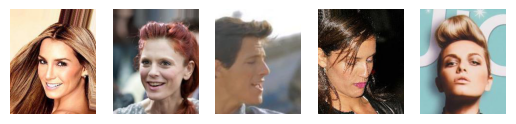

In [5]:
for i in range(5):  # Display up to 5 images in a row
    img = mpimg.imread(img_paths[i])
    plt.subplot(1, 5, i + 1)  # Create subplots in a 1x5 grid
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels


## **Landmarks Data**

In [6]:
landmarks.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [7]:
eye_x, eye_y, eye_w, eye_h= np.array(landmarks.iloc[:, 1:5])[0]
print(eye_x, eye_y, eye_w, eye_h)

69 109 106 113


## **Bounding Box Data**

In [8]:
bboxes.head()

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


## **Partition Dataset**

In [9]:
partition.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


## **Plot the landmarks on the face**

In [10]:
paths_to_images= 'archive/img_align_celeba/img_align_celeba/002844.jpg'
print(paths_to_images)

archive/img_align_celeba/img_align_celeba/002844.jpg


**Read image and find out the coordinates of the face** 

In [11]:
example_image = cv2.imread(paths_to_images)

eye_x, eye_y, eye_w, eye_h= np.array(landmarks.iloc[:, 1:5])[1]
nose_x, nose_y, leftmouth_x, leftmouth_y, rightmouth_x, rightmouth_y= np.array(landmarks.iloc[:,5:])[0]
print(eye_x, eye_y, eye_w, eye_h)
print(nose_x, nose_y, leftmouth_x, leftmouth_y, rightmouth_x, rightmouth_y)

69 110 107 112
77 142 73 152 108 154


**Store the co-ordinates every facial parts**

In [12]:
left_eye= (eye_x, eye_y)
right_eye= (eye_w, eye_h)
nose= (nose_x+10, nose_y)
left_mouth= (leftmouth_x, leftmouth_y)
right_mouth= (rightmouth_x, rightmouth_y)
print(f'Left eye: {left_eye}')
print(f'Right eye:{right_eye}')
print(f'Nose eye: {nose}')
print(f'Left mouth eye:{left_mouth}')
print(f'Right mouth:{right_mouth}')

Left eye: (69, 110)
Right eye:(107, 112)
Nose eye: (87, 142)
Left mouth eye:(73, 152)
Right mouth:(108, 154)


**Create a copy and Convert the color space of BGR to RGB**

In [13]:
original_image= example_image.copy()
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)

**Draw a line on the landmarks**

In [14]:
example_image = cv2.line(example_image, left_eye, right_eye, (0, 255, 255),1)
example_image = cv2.line(example_image, left_eye, nose, (0, 255, 255), 1)
example_image = cv2.line(example_image, right_eye, nose, (0, 255, 255), 1)
example_image = cv2.line(example_image, nose, left_mouth,(0, 255, 255), 1)
example_image = cv2.line(example_image, nose, right_mouth, (0, 255, 255), 1)

**Plot the images**

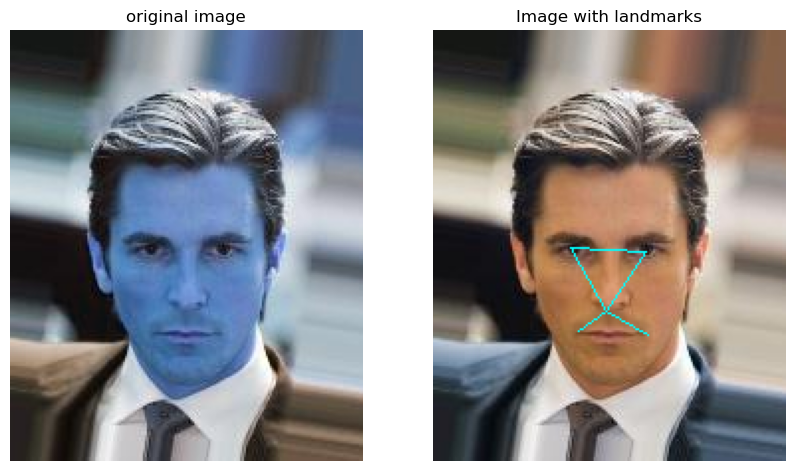

In [15]:
plt.figure(figsize = (10, 20))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('original image')
plt.imshow(original_image)
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Image with landmarks')
plt.imshow(example_image)

## **Reading the bounding box coordinates**

In [16]:
bboxes.head()

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


## **How to Plot Bounding Box Coordinates: :D Let's see**

**First, extract the rows of the image id from where we have done landmark localization**

In [17]:
current_bbox = bboxes.query('image_id == "{}"'.format(paths_to_images.split('/')[-1]))
print(current_bbox)

        image_id  x_1  y_1  width  height
2843  002844.jpg   37   96    307     401


In [18]:
x ,y ,w, h= np.array(current_bbox.iloc[:, 1:])[0]
print(x, y, w, h)

37 96 307 401


**Draw a rectangle (bounding) box in the image**

In [19]:
example_image= cv2.rectangle(example_image, (x-w, y), (w, h), (0, 255, 255), 1)
example_image.shape
#It has 218 height, 178 width, and 3 color channels (RGB)

(218, 178, 3)

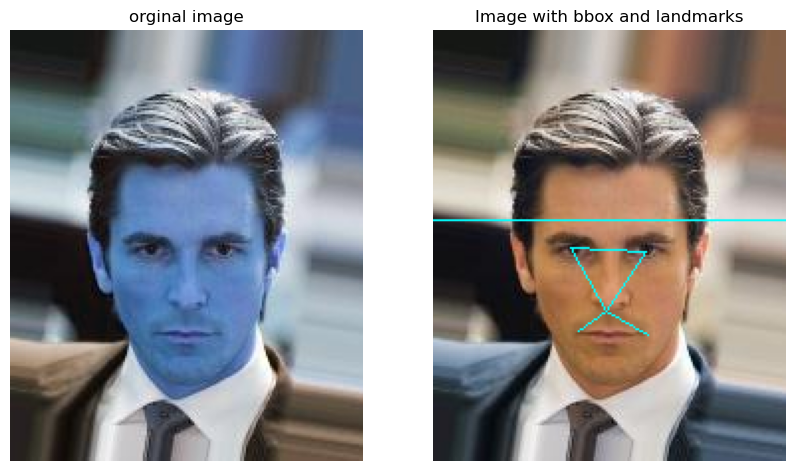

In [20]:
plt.figure(figsize= (10, 20))
plt.subplot(1, 2, 1) 
plt.axis('off')
plt.title('orginal image')
plt.imshow(original_image)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Image with bbox and landmarks')
plt.imshow(example_image)

### **Partition is the division of the images in training, validation, and testing of the images**

In [21]:
partition.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


**See the number of data divided in the this datasets**

In [22]:
partition['partition'].value_counts()

partition
0    162770
2     19962
1     19867
Name: count, dtype: int64

In [23]:
train_images= partition.query('partition==0')
valid_images= partition.query('partition==1')
test_images= partition.query('partition==2')

## Reading List_Attr_Celeba.csv

In [24]:
attributes.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


## **Discriminator**

**The discriminator is like a critic. It analyzes data (real or fake) and outputs a probability of it being real. This feedback helps train both the generator (to create more realistic data) and the discriminator itself (to better distinguish real from fake).**






In [25]:
# Import Pytorch Libraries.
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader, Subset

In [26]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model= nn.Sequential(
            nn.Conv2d(3, 64, kernel_size= 4, stride= 2, padding= 1), 
            nn.LeakyReLU(0.2), 
            nn.Conv2d(64, 128, kernel_size= 4, stride= 2, padding= 1), 
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 128, kernel_size= 4, stride= 2, padding= 1), 
            nn.LeakyReLU(0.2), 
            nn.Flatten(),
            nn.Dropout(0.2), 
            nn.Linear(128*8*8, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
            return self.model(x)

## **Generator**

**Generator is like a creative AI artist. It starts with random noise and uses it to produce new data (images, text, etc.) that gets progressively more realistic, aiming to fool a critic (discriminator) into thinking it's real.**

In [27]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 8*8*128),
            nn.LeakyReLU(0.2),
            nn.Unflatten(1, (128, 8, 8)),
            nn.ConvTranspose2d(128, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(512, 3, kernel_size=5, padding=2),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)
        

### **Load a dataset and create a dataloader**

In [28]:
transform= transforms.Compose([
    transforms.Resize((64, 64)), 
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])
full_dataset = datasets.ImageFolder('archive/img_align_celeba/', transform=transform)
subset_dataset= 2000
indices= list(range(subset_dataset))
subset= Subset(full_dataset, indices)

dataloader = DataLoader(subset, batch_size=32, shuffle=True)

**Check whether data sets have been loaded or not**

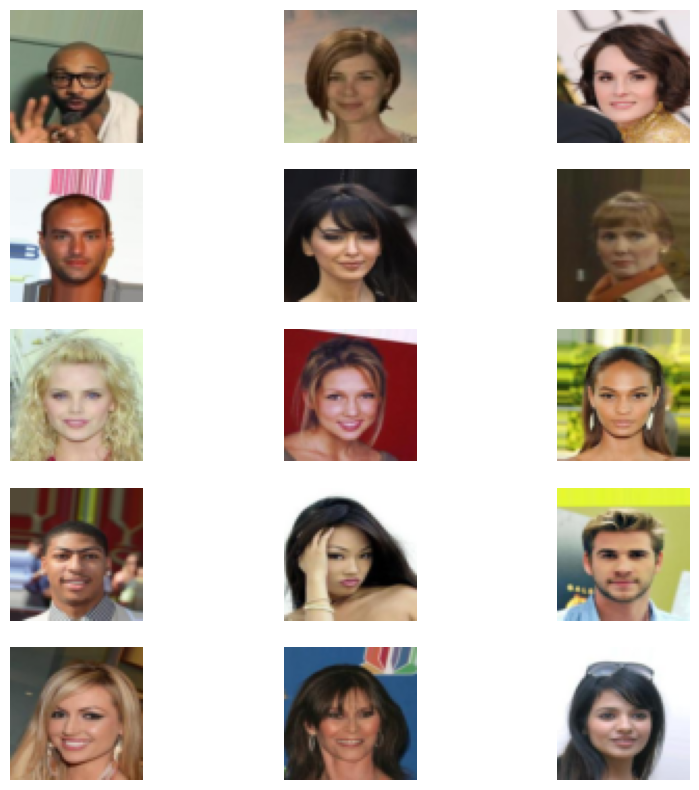

In [29]:
def show_images(images):
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        img = images[i].permute(1, 2, 0).numpy()
        img = (img * 0.5) + 0.5  # Unnormalize the image
        ax.imshow(img)
        ax.axis('off')
    plt.show()
images, _ = next(iter(dataloader))

show_images(images)

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [31]:
latent_dim= 100
generator= Generator(latent_dim).to(device)
discriminator= Discriminator().to(device)

criterion= nn.BCELoss()
d_optimizer= optim.Adam(discriminator.parameters(), lr= 0.0001)
g_optimizer= optim.Adam(generator.parameters(), lr= 0.0001)


In [35]:
def save_images(generator, epoch, num_images=10, latent_dim=100):
    os.makedirs('output_samples', exist_ok=True)
    generator.eval()
    with torch.no_grad():
        random_latent_vectors = torch.randn(num_images, latent_dim, device=device)
        generated_images = generator(random_latent_vectors)
        generated_images = (generated_images + 1) / 2  # Rescale to [0, 1]
        for i in range(num_images):
            save_image(generated_images[i], f"output_samples/generated_img_{epoch:03d}_{i}.png")
    generator.train()


In [36]:
epochs = 100

for epoch in range(epochs):
    for real_images, _ in dataloader:
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Train discriminator
        random_latent_vectors = torch.randn(batch_size, latent_dim, device=device)
        fake_images = generator(random_latent_vectors)

        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        d_loss_real = criterion(discriminator(real_images), real_labels)
        d_loss_fake = criterion(discriminator(fake_images.detach()), fake_labels)
        d_loss = d_loss_real + d_loss_fake

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Train generator
        fake_labels = torch.ones(batch_size, 1, device=device)
        g_loss = criterion(discriminator(fake_images), fake_labels)

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

    save_images(generator, epoch, num_images=10, latent_dim=latent_dim)


Epoch [1/100], d_loss: 0.0028, g_loss: 6.0376
Epoch [2/100], d_loss: 0.0005, g_loss: 9.4544
Epoch [3/100], d_loss: 0.0000, g_loss: 17.3350
Epoch [4/100], d_loss: 0.0000, g_loss: 17.2660
Epoch [5/100], d_loss: 0.0000, g_loss: 17.0652
Epoch [6/100], d_loss: 0.0001, g_loss: 22.8842
Epoch [7/100], d_loss: 0.0000, g_loss: 18.2432
Epoch [8/100], d_loss: 0.0000, g_loss: 16.4232
Epoch [9/100], d_loss: 0.0000, g_loss: 14.2589
Epoch [10/100], d_loss: 0.0000, g_loss: 12.3650
Epoch [11/100], d_loss: 0.0000, g_loss: 11.7839
Epoch [12/100], d_loss: 0.0001, g_loss: 10.7055
Epoch [13/100], d_loss: 0.0001, g_loss: 9.8199
Epoch [14/100], d_loss: 0.0001, g_loss: 9.4531
Epoch [15/100], d_loss: 0.0001, g_loss: 9.2646
Epoch [16/100], d_loss: 0.0001, g_loss: 9.0305
Epoch [17/100], d_loss: 0.0001, g_loss: 9.3727
Epoch [18/100], d_loss: 0.0001, g_loss: 9.2295
Epoch [19/100], d_loss: 0.0001, g_loss: 9.0870
Epoch [20/100], d_loss: 0.0001, g_loss: 9.4431
Epoch [21/100], d_loss: 0.0001, g_loss: 9.3519
Epoch [22/10